# important notes  
mortality rate is the rate of people who died because of an illness  
recovry rate is the rate of people who recovered from an illness  
morbidity rate is the rate of people who sick in an illness

In [1]:
# import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#import the first dataset (Сеть ООВО.csv)  
this dataset has the medical history of patients who are related to universities (students or Employees but mainly students)  
the main columns we are interested in are  
1- "entry_date" which contain the date of the submission to hospital (illness)  
2- "status" which contain four unique value (recovered, death, ill, no confirmation)  
    (the no confirmation patients will be considered ill in this project)  
3- "status_date" which contain the date which the "status" values were taken

we will create a new dataframe which contain dates from (3/12/2020 to 10/30/2020) in column "date" the reason for this range of dates is related to the second dataset (Стопкоронавирус.csv) which will be used for comparing the results we obtain from this dataset.  
we will add three empty column to the new dataframe  
1- "ill" contain the overall number of ill people until the date in the "date" column  
2- "death" contain the overall number of dead people until the date in the "date" column  
3- "recovery" contain the overall number of recoverd people until the date in the "date" column

In [57]:
df = pd.read_csv("Сеть ООВО.csv",delimiter=';',encoding='cp1251')
df['entry_date'] = pd.to_datetime(df['entry_date'])
df['status_date'] = pd.to_datetime(df['status_date'])
df_1 = pd.DataFrame()
df_1["date"] = pd.date_range(start='3/12/2020', end = "10/30/2020")
df_1["ill"]=0
df_1["death"]=0
df_1["recovery"]=0
df_1

date  ill  death  recovery
0   2020-03-12    0      0         0
1   2020-03-13    0      0         0
2   2020-03-14    0      0         0
3   2020-03-15    0      0         0
4   2020-03-16    0      0         0
..         ...  ...    ...       ...
228 2020-10-26    0      0         0
229 2020-10-27    0      0         0
230 2020-10-28    0      0         0
231 2020-10-29    0      0         0
232 2020-10-30    0      0         0

[233 rows x 4 columns]

in the next cells we will calculate the values of the three empty colmns

# this particular cell will take too much time to be computed so please wait..... ))))

In [49]:

for i in range(207672):
    entry_date = df.loc[i,"entry_date"]
    j = df_1[df_1["date"]==entry_date].index.values
    df_1["ill"][j] = df_1["ill"][j]+1
    status_date = df.loc[i,"status_date"]
    status = df.loc[i,"status"]
    k = df_1[df_1["date"]== status_date].index.values
    if status == 'Выздоровел' :
        df_1["recovery"][k] = df_1["recovery"][k]+1
    elif status == "Летальный исход":
        df_1["death"][k] = df_1["death"][k]+1
df1=df_1

In [50]:
for i in range(232):
    df1["ill"][i+1] = df1["ill"][i]+df1["ill"][i+1]
    df1["recovery"][i+1] = df1["recovery"][i]+df1["recovery"][i+1]
    df1["death"][i+1] = df1["death"][i]+df1["death"][i+1]


create and calculate the mortality rate and the recovery rate as a time series  
the morbidity rate will not be calculated because we do not know the total number of the sample (the total number of the sample which contains the number of the sick and healthy people)  

In [51]:
df1['mortality_rate'] = (df1["death"]/df1["ill"]*100)
df1['recovery_rate']=(df1["recovery"]/df1["ill"]*100)  
df1['mortality_rate'] = df1['mortality_rate'].fillna(0)
df1['recovery_rate'] = df1['recovery_rate'].fillna(0)
df1

date    ill  death  recovery  mortality_rate  recovery_rate
0   2020-03-12      0      0         0        0.000000       0.000000
1   2020-03-13      0      0         0        0.000000       0.000000
2   2020-03-14      1      0         1        0.000000     100.000000
3   2020-03-15      2      0         1        0.000000      50.000000
4   2020-03-16      2      0         1        0.000000      50.000000
..         ...    ...    ...       ...             ...            ...
228 2020-10-26  25523     55     11758        0.215492      46.068252
229 2020-10-27  25887     57     11954        0.220188      46.177618
230 2020-10-28  26144     58     12094        0.221848      46.259180
231 2020-10-29  27894     62     13030        0.222270      46.712555
232 2020-10-30  28297     62     13216        0.219104      46.704598

[233 rows x 6 columns]

# import the second dataset (Стопкоронавирус.csv)  
we will import the second dataset which contain the covid-19 medical history in each region in russia  
the most important columns are  
"status_date" contains the date  
"region_name" contains region names in russia (85 unique values)  
"recovery" the total number of recoverd people until the date of "status date"  
"ill" the total number of ill people until the date of "status date"  
"death" the total number of dead people until the date of "status date"  
"people_rf" the population in this region  
### one important thing to note is:  
this dataset has valuse from 2020-03-12 until 2022-11-23 but after the date of 2020-10-30 the data inside dataset becomes unuseful because the "region_name" values become "Nan" which render our data to be unuseful and because of this we had to take patients from the first dataset who were diagnosed befor (2020-10-30). 

In [53]:
# import the dataset (Стопкоронавирус.csv)
df_2 = pd.read_csv("Стопкоронавирус.csv",delimiter=';',encoding='cp1251')
df2 = df_2.iloc[:, [0,2,3,6,7,12]]
df2=df2.dropna()
df2['date_stat'] = pd.to_datetime(df2['date_stat'])
df2

date_stat                      region_name  recovery      ill  death  \
0     2020-03-12                Республика Адыгея       0.0      0.0    0.0   
1     2020-03-12                   Алтайский край       0.0      0.0    0.0   
2     2020-03-12                 Амурская область       0.0      0.0    0.0   
3     2020-03-12            Архангельская область       0.0      0.0    0.0   
4     2020-03-12             Астраханская область       0.0      0.0    0.0   
...          ...                              ...       ...      ...    ...   
20000 2020-10-30             Чеченская Республика    2099.0   2629.0   47.0   
20001 2020-10-30             Чувашская Республика    8381.0   9841.0  142.0   
20002 2020-10-30       Чукотский автономный округ     213.0    239.0    2.0   
20003 2020-10-30  Ямало-Ненецкий автономный округ   14446.0  20374.0  141.0   
20004 2020-10-30              Ярославская область   10216.0  11287.0   58.0   

       people_rf  
0       453376.0  
1      2350080.0  
2       798424.0  
3      1111031.0  
4      1017514.0  
...          ...  
20000  1436981.0  
20001  1231117.0  
20002    49348.0  
20003   538547.0  
20004  1265684.0  

[19788 rows x 6 columns]

taking the unique values of the region_name column

In [54]:
# defining two arrays with the name of the unique age groups and the unique regions
regions= df2.region_name.unique()
regions.shape


(85,)

# plotting  
we will plot three graph for each region in russia  
1- first graph contains two time_series lines, the first one is the mortality rate in the selected region and the second one is mortality rate from the "Сеть ООВО.csv" dataset  
2- second graph contains two time_series lines, the first one is the recovery rate in the selected region and the second one is recovery rate from the "Сеть ООВО.csv" dataset  
3- third graph contains one time_series line, which is the morbidity rate in the selected region  
the graph can help us explain and compare the moratality rate and the recovery rate between each region and the first dataset  
the morbidity rate can help us getting insight on the general situation in russia

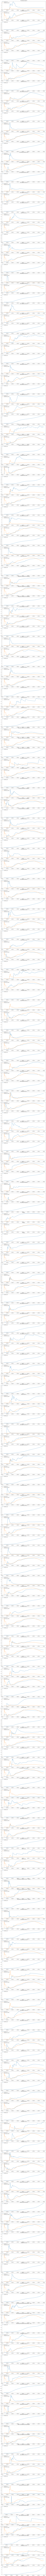

In [56]:
figure, axis = plt.subplots(255, 1,sharex=False, sharey=False,figsize=(15,900))
for i in range(85) :
    d=df2.loc[df2['region_name'] == regions[i]]
    ref = d.iloc[0,5]
    d['mortality_rate'] = (d["death"]/d["ill"]*100)
    d['recovery_rate']=(d["recovery"]/d["ill"]*100)
    d["morbidity_rate"] =(d["ill"]/ref*100)  
    d['mortality_rate'] = d['mortality_rate'].fillna(0)
    d['recovery_rate'] = d['recovery_rate'].fillna(0)
    axis[(i*3)].plot(d.date_stat, d.mortality_rate,label="mortality_rate")
    axis[(i*3)].plot(df1.date, df1.mortality_rate,label="mortality_rate_OOBO")
    axis[(i*3)].legend(loc ="upper left")
    axis[(i*3)].set_title(regions[i])
    axis[(i*3)+1].plot(d.date_stat, d.recovery_rate,label="recovery_rate")
    axis[(i*3)+1].plot(df1.date, df1.recovery_rate,label="recovery_rate_OOBO")
    axis[(i*3)+1].legend(loc ="upper left")
    axis[(i*3)+1].set_title(regions[i])
    axis[(i*3)+2].plot(d.date_stat, d.morbidity_rate,label="morbidity_rate")
    axis[(i*3)+2].legend(loc ="upper left")
    axis[(i*3)+2].set_title(regions[i])
    

plt.show()    
    
    